# 2021 Dask User Survey Results

This post presents the results of the 2021 Dask User Survey, which ran earlier this year.
Thanks to everyone who took the time to fill out the survey!
These results help us better understand the Dask community and will guide future development efforts.

The raw data, as well as the start of an analysis, can be found in this binder:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/dask/dask-examples/main?filepath=surveys/2021.ipynb)

Let us know if you find anything in the data.

## Contents

- [Highlights](#highlights)
- [Who are Dask users?](#who-are-dask-users)
- [How people like to use Dask](#how-people-like-to-use-dask)
- [Diagnostics](#diagnostics)
- [Stability](#stability)
- [User satisfaction, support, and documentation](#user-satisfaction)
- [Suggestions for improvement](#suggestions-for-improvement)
- [Previous survey results](#previous-survey-results)


## Highlights <a class="anchor" id="highlights"></a>

We had 247 responses to the survey (roughly the same as last year, which had just under 240 responses). Overall, responses were similar to previous years.

We asked 43 questions in the survey (an increase of 18 questions compared to the year before). We asked a bunch of new questions about the types of datasets people work with, the stability of Dask, and what kinds of industries people work in.

Our community wants:

- More documentation and examples
- More intermediate level documentation
- To improve the resiliancy of Dask (i.e. do computatoins complete?)

Users also value these features:

- Improved scaling
- Ease of deployment
- Better scikit-learn & machine learning support

### The typical Dask user

The survey shows us there is a lot of diversity in our community, and there is no one way to use Dask. That said, our hypothetical "typical" Dask user:

- Works with gigabyte sized datasets
- Stored on a local filesystem
- Has been using Dask between 1 and 3 years
- Uses Dask occasionally, not every day
- Uses Dask interactively at least part of the time
- Uses a compute cluster (probably)
- Likes to view the Dask dashboard with a web browser
- For the most part, Dask is stable enough for their needs, but improving the Dask's resiliancy would be helpful
- Uses the Dask dataframe, delayed, and maybe the Dask Array API, alongside numpy/pandas and other python libraries
- The most useful thing that would help this person is more documentation, and more examples using Dask in their field.
- They likely work in a scientific field (perhaps geoscience, life science, physics, or astronomy), or alternatively they might work in accounting, finance, insurance, or as a tech worker.

You can read the survey results from previous years here: [2020 survey results](https://blog.dask.org/2020/09/22/user_survey), [2019 survey results](https://blog.dask.org/2019/08/05/user-survey).

In [7]:
# Let's load in the survey data...
%matplotlib inline

from pprint import pprint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import re


df2019 = (
    pd.read_csv("data/2019-user-survey-results.csv.gz", parse_dates=["Timestamp"])
      .replace({"How often do you use Dask?": "I use Dask all the time, even when I sleep"}, "Every day")
)

df2020 = (
    pd.read_csv("data/2020-user-survey-results.csv.gz")
      .assign(Timestamp=lambda df: pd.to_datetime(df['Timestamp'], format="%Y/%m/%d %H:%M:%S %p %Z").astype('datetime64[ns]'))
      .replace({"How often do you use Dask?": "I use Dask all the time, even when I sleep"}, "Every day")
)

df2021 = (
    pd.read_csv("data/2021-user-survey-results.csv.gz")
      .assign(Timestamp=lambda df: pd.to_datetime(df['Timestamp']).astype('datetime64[ns]'))
      .replace({"How often do you use Dask?": "I use Dask all the time, even when I sleep"}, "Every day")
)

common = df2019.columns & df2020.columns & df2021.columns
added = df2021.columns.difference(df2020.columns)
dropped = df2020.columns.difference(df2021.columns)

df = pd.concat([df2019, df2020, df2021])
df['Year'] = df.Timestamp.dt.year
df = df.set_index(['Year', 'Timestamp']).sort_index()

/tmp/ipykernel_85466/1303943147.py:28: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  common = df2019.columns & df2020.columns & df2021.columns


## Who are Dask users? <a class="anchor" id="who-are-dask-users"></a>

Most people said they use Dask occasionally, while a smaller group use Dask every day. There is a wide variety in how long people have used Dask for, with the most common response being between one and three years.

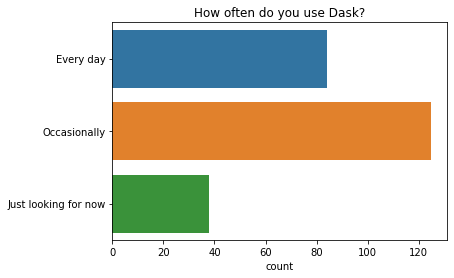

In [108]:
q = "How often do you use Dask?"
ax = sns.countplot(y=q, data=df2021[q].dropna().str.split(";").explode().to_frame());
ax.set(ylabel="", title=q);

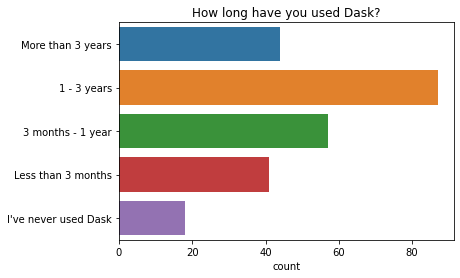

In [107]:
q = "How long have you used Dask?"  # New question in 2021
order = ["More than 3 years", "1 - 3 years", "3 months - 1 year", "Less than 3 months", "I've never used Dask"]
ax = sns.countplot(y=q, data=df2021[q].dropna().str.split(";").explode().to_frame(), order=order);
ax.set(ylabel="", title=q);

Just over half of respondants use Dask with other people (their team or organisation), and the other half use Dask on their own. 

In the last year, there has been an increase in the number of people who say that many people throughout their institution use Dask (32 people said this in 2021, compared to 19 in 2020).

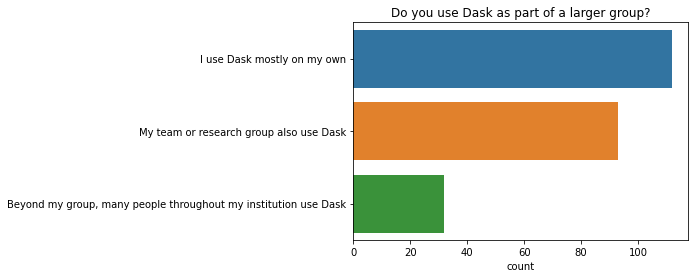

In [106]:
q = "Do you use Dask as part of a larger group?"
order = [
    'I use Dask mostly on my own',
    'My team or research group also use Dask',
    'Beyond my group, many people throughout my institution use Dask',
]
ax = sns.countplot(y=q, data=df2021[q].dropna().str.split(";").explode().to_frame(), order=order)
ax.set(ylabel="", title=q);

### What industry do you work in?

There was a wide variety of industries represented in the survey.

Almost half of responses were in an industry related to science, academia, or a governmant laboratory. Geoscicence had the most responses, while life sciences, physics, and astronomy were also popular fields.

Around 30 percent of responses were from people in businesss and tech. Of these, there was a roughly even split between people in accounting/finance/insurance vs other tech workers.

Around 10 percent of responses belonged to manufacturing, engineering, and other industry (energy, aerospace, etc). The remaining responses were difficult to categorise.

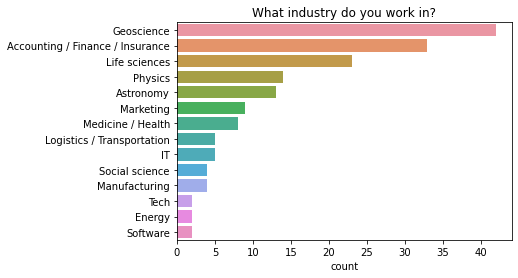

In [166]:
q = "What industry do you work in?"  # New question in 2021
data = df2021[q].dropna().str.split(";").explode().to_frame()
order = data.value_counts()[data.value_counts() > 1].keys().get_level_values(0)
ax = sns.countplot(y=q, data=data, order=order);
ax.set(ylabel="", title=q);

### How easy is it for you to upgrade to newer versions of Python libraries?

The majority of users are able to easily upgrade to newer versoins of python libraries when they want.

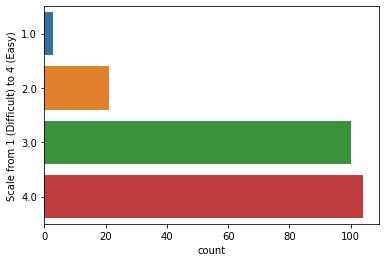

In [56]:
q = "How easy is it for you to upgrade to newer versions of Python libraries"
sns.countplot(y=q, data=df2021[q].dropna().explode().to_frame()).set_ylabel('Scale from 1 (Difficult) to 4 (Easy)');

## How people like to use Dask <a class="anchor" id="how-people-like-to-use-dask"></a>


People like to use Dask in conjunction with numpy and pandas, along with a range of other python libraries.
The most popular Dask APIs are [Dask Dataframes](https://docs.dask.org/en/latest/dataframe.html), [Dask Delayed](https://docs.dask.org/en/latest/delayed.html), and [Dask Arrays](https://docs.dask.org/en/latest/array.html).

The vast majority of people like to use Dask interactively with Jupyter or IPython at least part of the time, and most people view the [Dask Dashboard](https://docs.dask.org/en/latest/diagnostics-distributed.html) with a web browser.


### What are some other libraries that you often use with Dask?"

The ten most common libraries people use with Dask are: `numpy`, `pandas`, `xarray`, `scikit-learn`, `scipy`, `statsmodels`, `matplotlib`, `xgboost`, `numba`, and `joblib`.


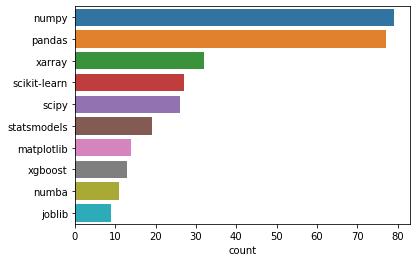

In [54]:
q = "What are some other libraries that you often use with Dask?"
data = df2021[q].dropna().str.lower().str.split(", ").explode().to_frame()
labels = pd.value_counts(data[q]).iloc[:10].index
sns.countplot(y=q, data=data, order=labels).set_ylabel('');

## Dask APIs

The three most popular Dask APIs people use are:
1. [Dask Dataframes](https://docs.dask.org/en/latest/dataframe.html)
2. [Dask Delayed](https://docs.dask.org/en/latest/delayed.html)
3. [Dask Arrays](https://docs.dask.org/en/latest/array.html)

In 2021, we saw a small increase in the number of people who use [dask delayed](https://docs.dask.org/en/latest/delayed.html), compared with previous years. This might be a good thing, it's possible that as people develop experience and confidence with Dask, they are more likely to start using more advanced features such as [delayed](https://docs.dask.org/en/latest/delayed.html). Besides this change, preferences were pretty simliar to the results from previous years.

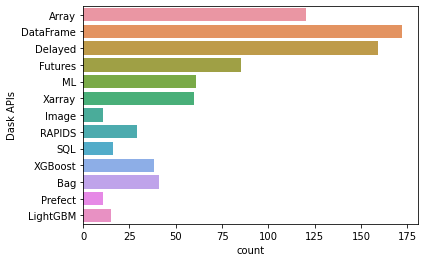

In [87]:
apis = df2021['Dask APIs'].str.split(", ").explode()
top = apis.value_counts().loc[lambda x: x > 10]
apis = apis[apis.isin(top.index)].reset_index()

sns.countplot(y="Dask APIs", data=apis);

### Interactive or Batch?

The vast majority of people like to use Dask interactively with Jupyter or IPython at least part of the time. Less than 15% of Dask users only use Dask in batch mode (submitting scripts that run in the future).

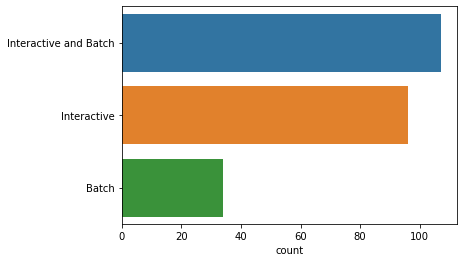

In [67]:
q = 'Interactive or Batch?'
data = df2021[q].dropna()
data = data.str.replace('Interactive:  I use Dask with Jupyter or IPython when playing with data, Batch: I submit scripts that run in the future', "Interactive and Batch")
data = data.str.replace('Interactive:  I use Dask with Jupyter or IPython when playing with data', "Interactive")
data = data.str.replace('Batch: I submit scripts that run in the future', "Batch")
order = ["Interactive and Batch", "Interactive", "Batch"]
sns.countplot(y=q, data=data.explode().to_frame(), order=order).set_ylabel('');

### How do you view Dask's dashboard?

Most people look at the Dask dashboard using a web browser. A smaller group use the [dask jupyterlab extension](https://github.com/dask/dask-labextension).

A few people are still not sure what the dashboard is all about. If that's you too, you might like to watch [this 20 minute video](https://youtu.be/N_GqzcuGLCY) that explains why the dashboard is super useful, or see the rest of the docs [here](https://docs.dask.org/en/latest/diagnostics-distributed.html).

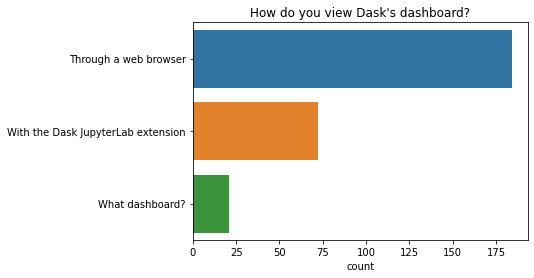

In [103]:
q = "How do you view Dask's dashboard?"
ax = sns.countplot(y=q, data=df2021[q].dropna().str.split(", ").explode().to_frame());
ax.set(ylabel="", title=q);

### Local machine or Cluster?

Roughly two thirds of respondants use a computing cluster at least part of the time.

In [141]:
q = 'Local machine or Cluster?'
df[q].dropna().str.contains("Cluster").astype(int).groupby("Year").mean()

Year
2019    0.654902
2020    0.666667
2021    0.630081
Name: Local machine or Cluster?, dtype: float64

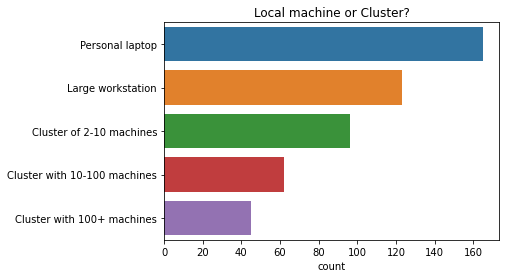

In [138]:
q = 'Local machine or Cluster?'
order = [
    'Personal laptop',
    'Large workstation',
    'Cluster of 2-10 machines',
    'Cluster with 10-100 machines',
    'Cluster with 100+ machines'
]
ax = sns.countplot(y=q, data=df2021[q].dropna().str.split(", ").explode().to_frame(), order=order);
ax.set(ylabel="", title=q);

#### If you use a cluster, how do you launch Dask?

SSH is the most common way to launch Dask on a compute cluster, followed by a HPC resource manager, then Kubernetes.

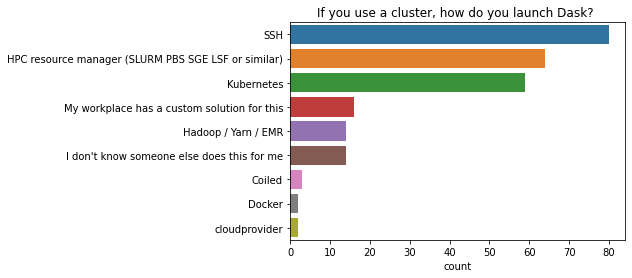

In [145]:
q = "If you use a cluster, how do you launch Dask? "
data = df2021[q].dropna()
data = data.str.replace("HPC resource manager (SLURM, PBS, SGE, LSF or similar)", "HPC resource manager (SLURM PBS SGE LSF or similar)", regex=False)
data = data.str.replace("I don't know, someone else does this for me", "I don't know someone else does this for me", regex=False)
data = data.str.split(", ").explode().to_frame()
order = data.value_counts()[data.value_counts() > 1].keys().get_level_values(0)
ax = sns.countplot(y=q, data=data, order=order);
ax.set(ylabel="", title=q);

#### If you use a cluster, do you have a need for multiple worker types in the same cluster?

Of the people who use compute clusters, a little less than half have a need for multiple worker types in the same cluster. Examples of this might include mixed workers with GPU vs no GPU, mixed workers with low or high memory allocations, etc.

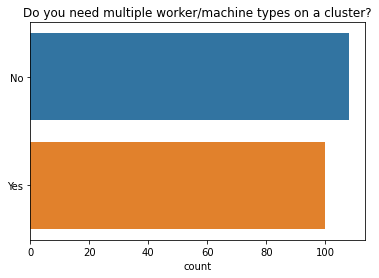

In [102]:
q = "If you use a cluster, do you have a need for multiple worker / machine types (e.g. GPU / no GPU, low / high memory) in the same cluster?"  # New question in 2021
ax = sns.countplot(y=q, data=df2021[q].dropna().str.split(";").explode().to_frame());
ax.set(ylabel="", title="Do you need multiple worker/machine types on a cluster?");

### Datasets

#### How large are your datasets typically?

Dask users most commonly work with gigabyte sized datasets. Very few users work with petabyte sized datasets.

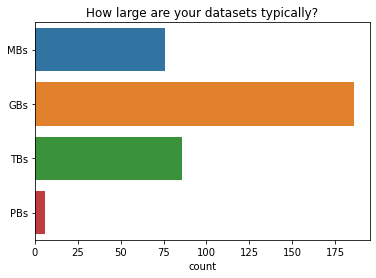

In [146]:
q = "How large are your datasets typically?"  # New question in 2021
ax = sns.countplot(y=q, data=df2021[q].dropna().str.split(", ").explode().to_frame());
ax.set(ylabel="", title=q);

#### Where are your datasets typically stored?

Most people store their data on a local filesystem.

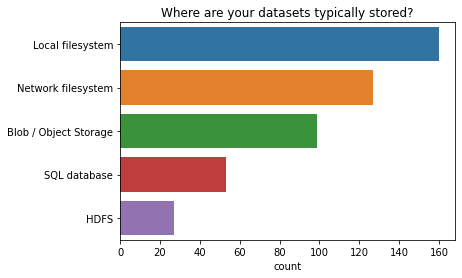

In [153]:
q = "Where are your datasets typically stored?"  # New question in 2021
data = df2021[q].dropna().str.split(", ").explode().to_frame()
order = data.value_counts()[data.value_counts() > 1].keys().get_level_values(0)
ax = sns.countplot(y=q, data=data, order=order);
ax.set(ylabel="", title=q);

#### What file formats do you typically work with?

The two most common file formats (`csv` and `parquet`) are popular among Dask Dataframe users. The `JSON` file format is also very commonly used with Dask. The fourth and fifth most common filetypes (`HDF5` and `zarr`) are popular among Dask Array users. This fits with what we know about the Dask Dataframe API being the most popular, with Dask Arrays close behind.

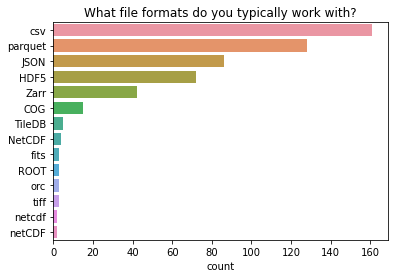

In [149]:
q = "What file formats do you typically work with?"  # New question in 2021
data = df2021[q].dropna().str.split(", ").explode().to_frame()
order = data.value_counts()[data.value_counts() > 1].keys().get_level_values(0)
ax = sns.countplot(y=q, data=data, order=order);
ax.set(ylabel="", title=q);

This survey question had a long tail: a very wide variety of specialized file formats were reported, most only being used by one or two individuals who replied to the survey.

A lot of these specialized file formats store image data, specific to particular fields (astronomy, geoscience, microscopy, etc.).

In [150]:
list(data.value_counts()[data.value_counts() == 1].keys().get_level_values(0))

['proprietary measurement format',
 'netCDF3',
 'czi',
 'specifically NetCDF4',
 'grib2',
 'in-house npy-like array format',
 'jpeg2000',
 'netCDF4 (based on HDF5)',
 'proprietary microscopy file types. Often I convert to Zarr with a loss of metadata.',
 'sas7bdat',
 'npy',
 'npy and pickle',
 'root with uproot',
 'root',
 'regular GeoTiff',
 '.npy',
 'Text',
 'VCF BAM CRAM',
 'UM',
 'CASA measurement sets',
 'Casa Tables (Radio Astronomy specific)',
 'Custom binary',
 'FITS',
 'FITS (astronomical images)',
 'FITS and a custom semi-relational table specification that I want to kill and replace with something better',
 'Feather (Arrow)',
 'GPKG',
 'GeoTIFF',
 'NetCDF4',
 'Netcdf',
 'Netcdf4',
 'PP',
 'SQL',
 'SQL query to remote DB',
 'SQL to Dataframe',
 'Seismic data (miniSEED)',
 'TFRecords',
 'TIFF',
 'Testing with all file formats. Just want it as a replacement for spark. ',
 '.raw image files',
 'ugh']

<img src="https://imgs.xkcd.com/comics/standards_2x.png" alt="XKCD comic 927: Competing Standards"> 


### Preferred Cloud?

The most popular cloud solution is Amazon Web Services (AWS), followed by Google Cloud Platform (GCP) and Microsoft Azure. 

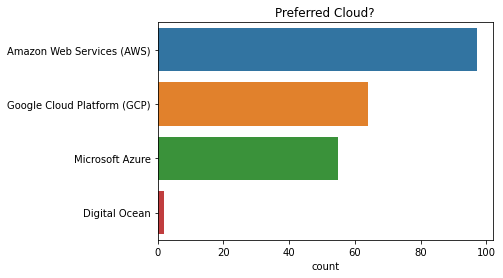

In [96]:
q = "Preferred Cloud?"
order = [
    "Amazon Web Services (AWS)",
    "Google Cloud Platform (GCP)",
    "Microsoft Azure",
    "Digital Ocean",    
]
ax = sns.countplot(y=q, data=df2021[q].dropna().str.split(", ").explode().to_frame(), order=order);
ax.set(ylabel="", title=q);

### Do you use Dask projects to deploy?

Among those who use dask projects to deploy, [dask-jobqueue](https://github.com/dask/dask-jobqueue)
and [dask helm chart](https://github.com/dask/helm-chart) are the two most popular options.
There was a wide variety of projects people used for deployment.


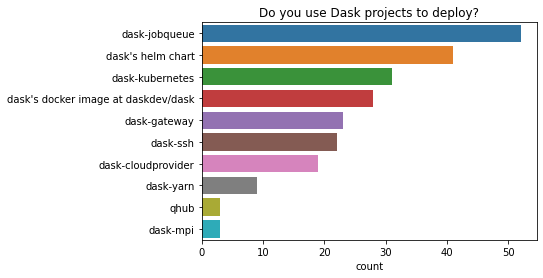

In [95]:
q = "Do you use Dask projects to deploy?"
order = [
    "dask-jobqueue",
    "dask's helm chart",
    "dask-kubernetes",
    "dask's docker image at daskdev/dask",
    "dask-gateway",
    "dask-ssh",
    "dask-cloudprovider",
    "dask-yarn",
    "qhub",
    "dask-mpi",
]
ax = sns.countplot(y=q, data=df2021[q].dropna().str.lower().str.split(", ").explode().to_frame(), order=order);
ax.set(ylabel="", title=q);

## Diagnostics <a class="anchor" id="diagnostics"></a>

We saw earlier that most people like to view the Dask Dashboard using their web browser.

In the dashboard, people said the most useful diagnostics plots were:

1. The task stream plot
2. The progress plot, and
3. The memory useage per worker plot


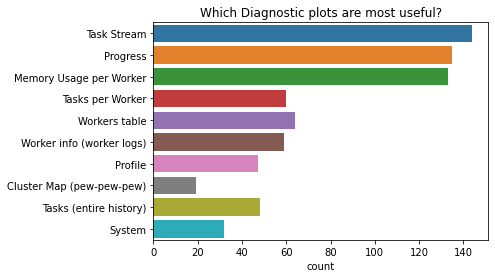

In [121]:
q = "Which Diagnostic plots are most useful?"  # New question in 2021
ax = sns.countplot(y=q, data=df2021[q].dropna().str.split(', ').explode().to_frame());
ax.set(ylabel="", title=q);

We also asked some new questions about diagnostics in 2021.

We found that most people (65 percent) do not use [Dask performance reports](https://distributed.dask.org/en/latest/diagnosing-performance.html#performance-reports), which is a way to save the diagnostic dashboard to static HTML plots for later review.

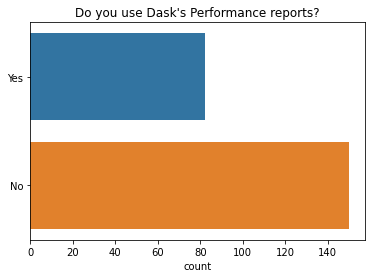

In [122]:
q = "Do you use Dask's Performance reports?"  # New question in 2021
ax = sns.countplot(y=q, data=df2021[q].explode().to_frame(), order=["Yes", "No"]);
ax.set(ylabel="", title=q);

Very few people use Dask's [Prometheus metrics](https://docs.dask.org/en/latest/setup/prometheus.html). Jacob Tomlinson has an excellent article on [Monitoring Dask + RAPIDS with Prometheus + Grafana](https://medium.com/rapids-ai/monitoring-dask-rapids-with-prometheus-grafana-96eaf6b8f3a0), if you're interested in learning more about how to use this feature.

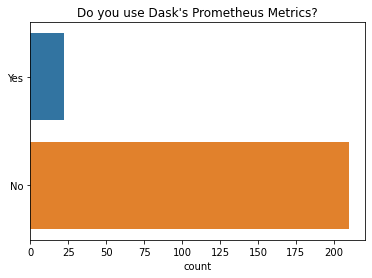

In [119]:
q = "Do you use Dask's Prometheus Metrics?"  # New question in 2021
ax = sns.countplot(y=q, data=df2021[q].explode().to_frame(), order=["Yes", "No"]);
ax.set(ylabel="", title=q);

## Stability <a class="anchor" id="stability"></a>

We asked a number of questions around the stability of Dask, many of them new questions in 2021.

The majority of people said Dask was resiliant enough for them (eg: computations complete).
However this is an area we could improve in, as 36 percent of people are not satisfied.
This was a new question 2021, so we can't say how people opinion of Dask's resiliancy has changed over time.



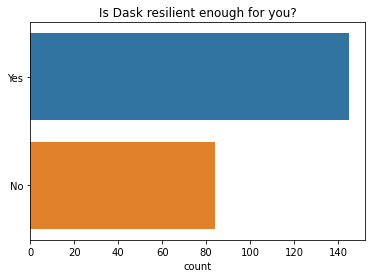

In [133]:
q = "Is Dask resilient enough for you? (e.g. computations complete)."  # new question in 2021
ax = sns.countplot(y=q, data=df2021[q].dropna().explode().to_frame(), order=["Yes", "No"]);
ax.set(ylabel="", title="Is Dask resilient enough for you?");

Most people say Dask in general is stable enough for them (eg: between different version releases). This is similar to the survey results from previous years.

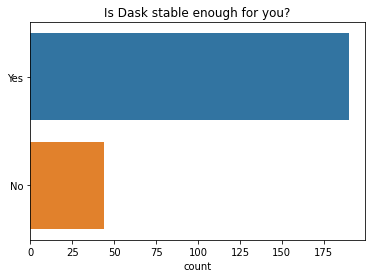

In [127]:
q = "Is Dask stable enough for you?"
ax = sns.countplot(y=q, data=df2021[q].dropna().explode().to_frame(), order=["Yes", "No"]);
ax.set(ylabel="", title=q);

People also say that the API of Dask is stable enough for them too.

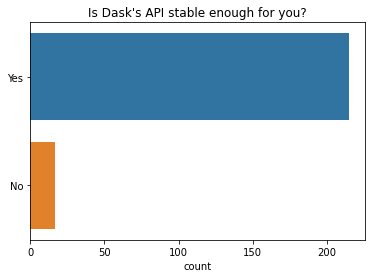

In [129]:
q = "Is Dask's API stable enough for you?"
ax = sns.countplot(y=q, data=df2021[q].dropna().explode().to_frame(), order=["Yes", "No"]);
ax.set(ylabel="", title=q);

The vast majority of people are satisfied with the current release frequency (roughly once every two weeks).

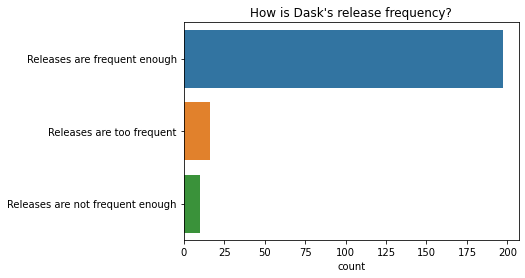

In [135]:
q = "How is Dask's release frequency?"  # New question in 2021
ax = sns.countplot(y=q, data=df2021[q].dropna().explode().to_frame());
ax.set(ylabel="", title=q);

Most people say they would pin their code to a long term support release, if one was available for Dask.

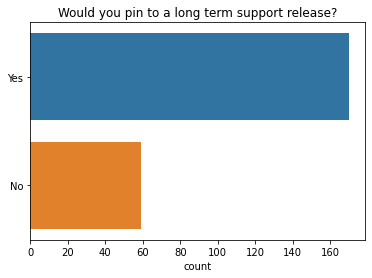

In [132]:
q = "If Dask had Long-term support (LTS) releases, would you pin your code to use them?"  # New question in 2021
ax = sns.countplot(y=q, data=df2021[q].dropna().explode().to_frame(), order=["Yes", "No"]);
ax.set(ylabel="", title="Would you pin to a long term support release?");

## User satisfaction, support, and documentation <a class="anchor" id="user-satisfaction"></a>

We asked a bunch of new questions about user satisfaction in the 2021 survey.

### How easy is Dask to use?

The majority of people say that Dask is moderately easy to use. This 

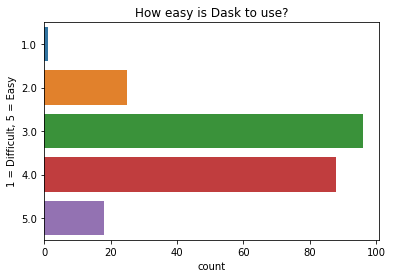

In [158]:
q = "On a scale of 1 - 5 (1 being hardest, 5 being easiest) how easy is Dask to use?"
ax = sns.countplot(y=q, data=df2021[q].dropna().explode().to_frame());
ax.set(ylabel="1 = Difficult, 5 = Easy", title="How easy is Dask to use?");

### How is Dask's documentation?

Most people think that Dask's documentation is pretty good.

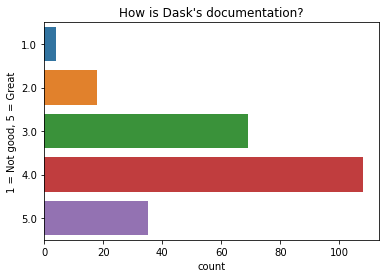

In [161]:
q = "How is Dask's documentation?"  # New question in 2021
ax = sns.countplot(y=q, data=df2021[q].dropna().explode().to_frame());
ax.set(ylabel="1 = Not good, 5 = Great", title=q);

### How satisfied are you with maintainer responsiveness on GitHub?

Almost everybody who responded feels positively about Dask's maintainer responsiveness on GitHub .


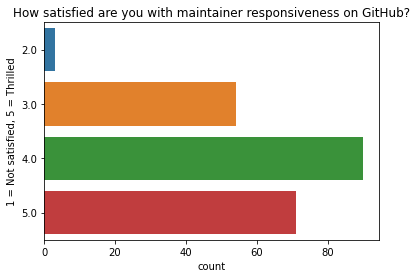

In [160]:
q = "How satisfied are you with maintainer responsiveness on GitHub?"  # New question in 2021
ax = sns.countplot(y=q, data=df2021[q].dropna().explode().to_frame());
ax.set(ylabel="1 = Not satisfied, 5 = Thrilled", title=q);

### What Dask resources have you used for support in the last six months?

The documentation at [dask.org](https://dask.org/) is the first place most users look for help.

The breakdown of responses to this question in 2021 was very similar to previous years, with the exception that no-one seemed to know that the [Dask YouTube channel](https://www.youtube.com/c/Dask-dev/videos) or Gitter chat existed in 2019.

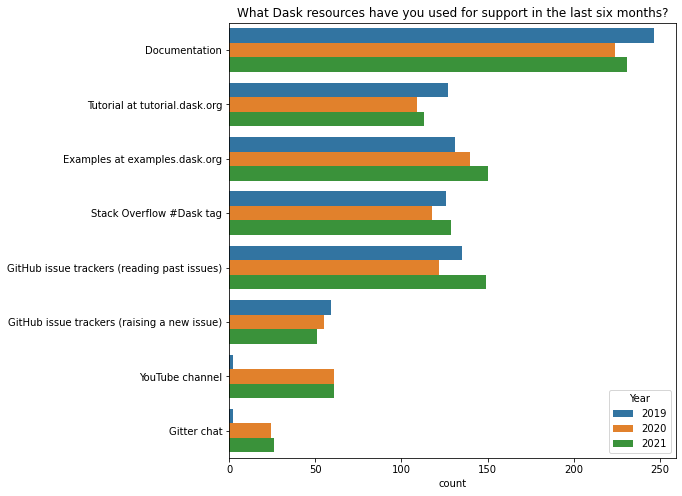

In [165]:
q = 'What Dask resources have you used for support in the last six months?'

resource_map = {
    "Tutorial": "Tutorial at tutorial.dask.org",
    "YouTube": "YouTube channel",
    "gitter": "Gitter chat"
}

df[q] = df[q].str.replace(';',', ')  # Make separator values consistent
d = df[q].str.split(', ').explode().replace(resource_map)
top = d.value_counts()[:8].index
d = d[d.isin(top)]

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.countplot(y=q, hue="Year", data=d.reset_index(), ax=ax);
ax.set(ylabel="", title=q);

## Suggestions for improvement <a class="anchor" id="suggestions-for-improvement"></a>    

### Which would help you most right now?

The two top priorities people said would help most right now are both related to documentation. People want more documentation, and more examples in their field. Performance improvements were also commonly mentioned as something that would help the most right now.

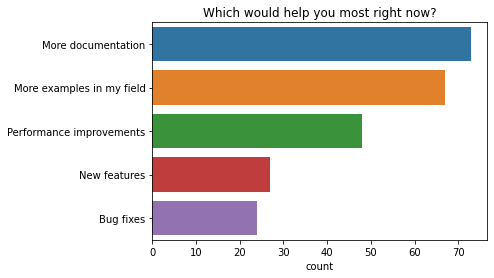

In [94]:
q = "Which would help you most right now?"
order = [
    "More documentation",
    "More examples in my field",
    "Performance improvements",
    "New features",
    "Bug fixes",
] 
ax = sns.countplot(y=q, data=df2021[q].explode().to_frame(), order=order)
ax.set(ylabel="", title=q);

### How can Dask improve?

We also gave people the opportunity for a free text response to the question "How can Dask imporove?"

Matt has previously written an [early anecdotes blogpost](https://blog.dask.org/2021/06/18/early-survey)
that dives into the responses to this question in more detail.

He found these recurring themes:

- Intermediate Documentation
- Documentation Organization
- Functionality
- High Level Optimization
- Runtime Stability and Advanced Troubleshooting

Since more documentation and examples were the two most requested improvements, I'll summarize some of the steps forward in that area here:

- Regarding more intermediate documentation, Matt says:
    >  There is a lot of good potential material that advanced users have around performance and debugging that could be fun to publish.

- Matt points out that Dask has excellent *reference documentation*, but lacks a lot of good *narrative documentation*. To address this, Julia Signell is currently investigating how we could improve the organization of Dask's documentation (you can subscribe to [this issue thread](https://github.com/dask/community/issues/170) if you want to follow that discussion)

- Matt comments that it's hard to have good *narrative documentation* when there are so many different *user narratives* (i.e. Dask is used by people from many different industries). This year, we added a new question to the survey asking for the industry people work in. We added this because *"More examples in my field"* has been one of the top two requests for the last three years. Now we can use that information to better target narrative documentation to the areas that need it most (geoscience, life science, and finance).

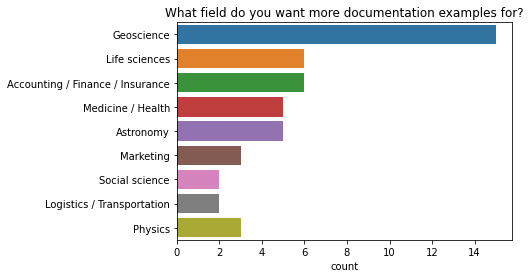

In [115]:
q = 'What industry do you work in?'
data = df2021[df2021["Which would help you most right now?"] == "More examples in my field"]
order = data[q].value_counts()[data[q].value_counts() > 1].keys()
ax = sns.countplot(y=q, data=data[q].dropna().str.split(', ').explode().to_frame(), order=order);
ax.set(ylabel="", title="What field do you want more documentation examples for?");

### What common feature requests do you care about most?

Good support for numpy and pandas is critical for most users.
Users also value:

- Improved scaling
- Ease of deployment
- Resiliancy of Dask
- Better scikit-learn & machine learning support

Most feature requests are similar to the survey results from previous years, although there was an increase in the number of people who say better scikit-learn/ML support is critical to them. We also added a new question about Dask's resiliancy in 2021.

In the figure below you can see how people rated the importance of each feature request, for each of the three years we've run this survey.

/home/genevieve/anaconda3/envs/dask/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


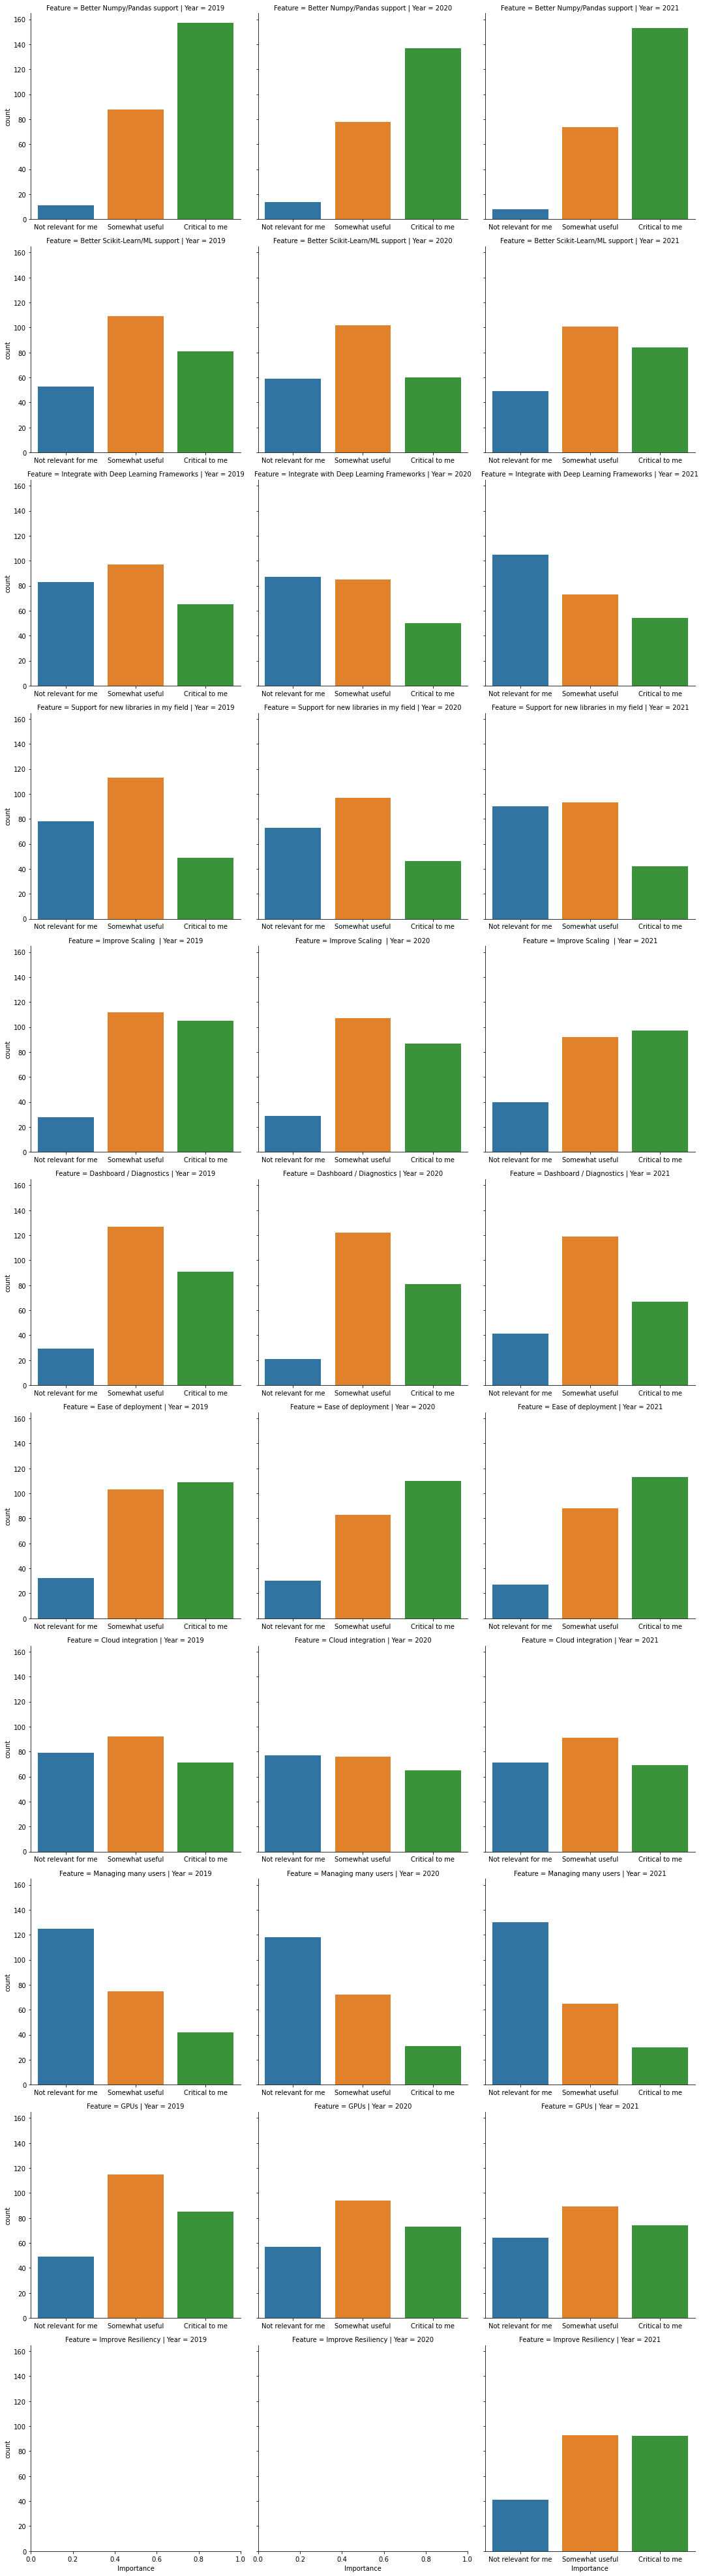

In [88]:
common = (df[df.columns[df.columns.str.startswith("What common feature")]]
          .rename(columns=lambda x: x.lstrip("What common feature requests do you care about most?[").rstrip(r"]")))
a = common.loc[2019].apply(pd.value_counts).T.stack().reset_index().rename(columns={'level_0': 'Question', 'level_1': "Importance", 0: "count"}).assign(Year=2019)
b = common.loc[2020].apply(pd.value_counts).T.stack().reset_index().rename(columns={'level_0': 'Question', 'level_1': "Importance", 0: "count"}).assign(Year=2020)
c = common.loc[2021].apply(pd.value_counts).T.stack().reset_index().rename(columns={'level_0': 'Question', 'level_1': "Importance", 0: "count"}).assign(Year=2021)

counts = pd.concat([a, b, c], ignore_index=True)

d = common.stack().reset_index().rename(columns={"level_2": "Feature", 0: "Importance"})
order = ["Not relevant for me", "Somewhat useful", 'Critical to me']
sns.catplot('Importance', row="Feature", kind="count", col="Year", data=d, sharex=False, order=order);

## Previous survey results <a class="anchor" id="previous-survey-results"></a>

Thanks to everyone who took the survey!

If you want to read more about the 2021 Dask survey, the blogpost on early anecdotes from the Dask 2021 survey [is available here](https://blog.dask.org/2021/06/18/early-survey).

You can read the survey results from previous years here: 

- [2020 survey results](https://blog.dask.org/2020/09/22/user_survey)
- [2019 survey results](https://blog.dask.org/2019/08/05/user-survey).
